# AR models

In [16]:
import pandas as pd
import numpy as np

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

import matplotlib.pyplot as plt

jtplot.style(figsize=(15, 9))

## AR-models Examples: Time-series Forecasting. Part 1

<AxesSubplot:>

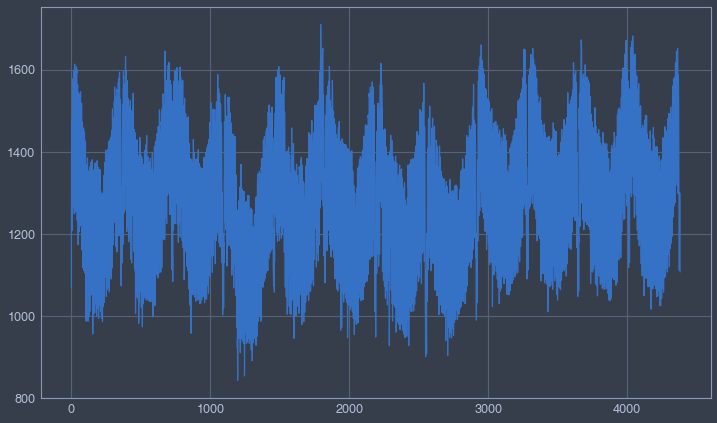

In [4]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=',')

df['Consumption'].plot()

In [5]:
df_stationarity_test = adfuller(df['Consumption'], autolag='AIC')
print(f'p-value: {df_stationarity_test[1]}')

p-value: 4.74405490184152e-08


In [6]:
df_stationarity_test

(-6.239148288864521,
 4.74405490184152e-08,
 31,
 4351,
 {'1%': -3.4318538295011636,
  '5%': -2.8622045082106773,
  '10%': -2.5671237222704466},
 47966.592823559666)

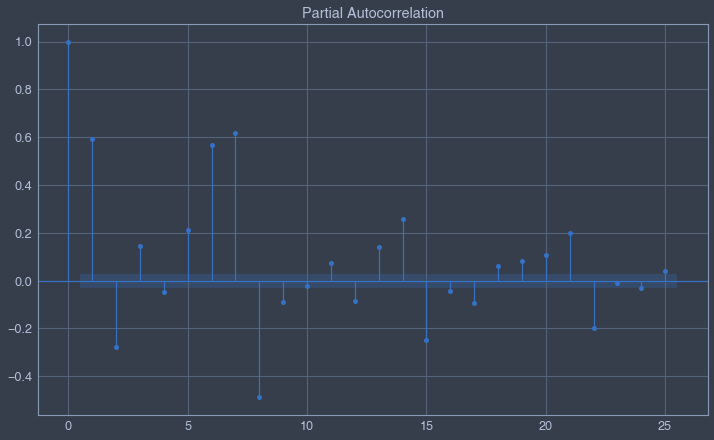

In [8]:
pacf = plot_pacf(df['Consumption'], lags=25)

In [10]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

ar_model = AutoReg(train_data, lags=8, old_names=True).fit()

print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Wed, 24 Jul 2024   AIC                              8.503
Time:                        20:43:39   BIC                              8.518
Sample:                             8   HQIC                             8.509
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

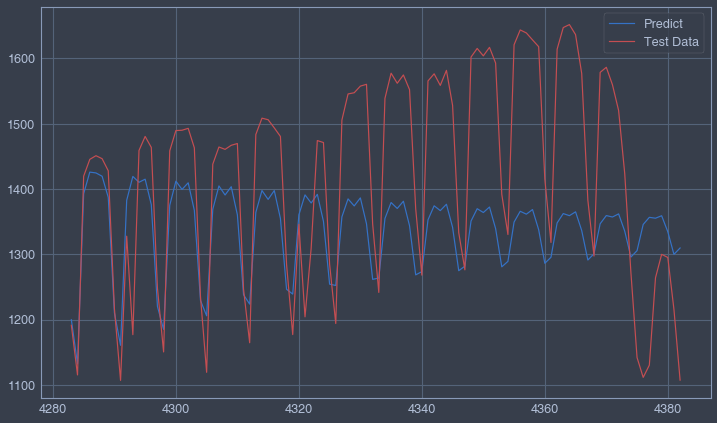

In [14]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

plt.plot(pred, label='Predict')
plt.plot(test_data, color='r', label='Test Data')
plt.legend()

## AR-models Examples: Time-series Forecasting. Part 2

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', header=0, index_col=0)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


<AxesSubplot:xlabel='Date'>

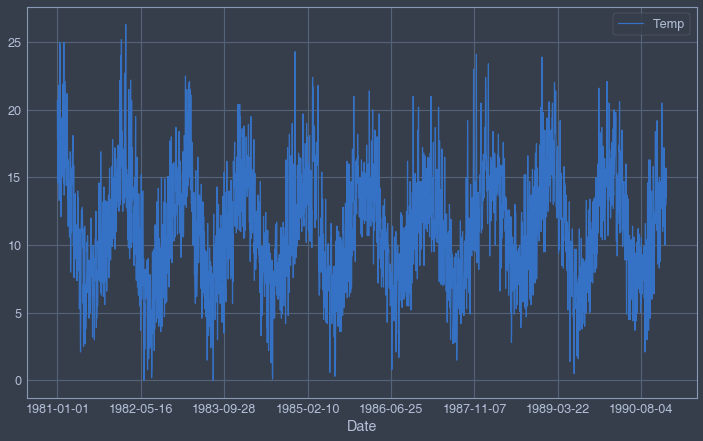

In [6]:
df.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

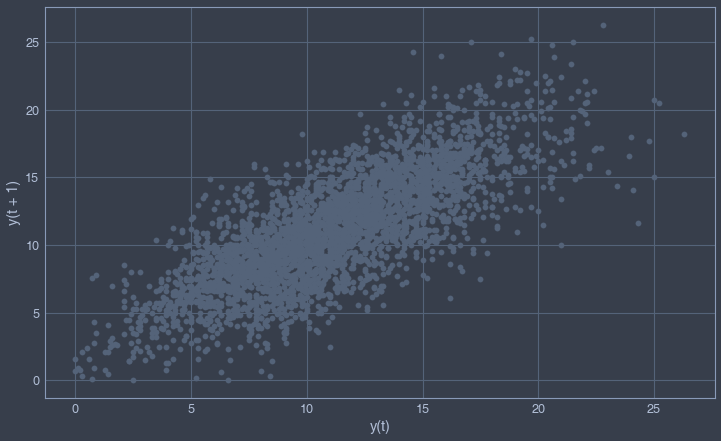

In [7]:
pd.plotting.lag_plot(df) # clearly shows a relationship or correlation.

In [10]:
df['t+1'] = df['Temp'].shift(1)
df

,Temp,t+1
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,20.7
1981-01-03,18.8,17.9
1981-01-04,14.6,18.8
1981-01-05,15.8,14.6
...,...,...
1990-12-27,14.0,14.6
1990-12-28,13.6,14.0
1990-12-29,13.5,13.6


In [11]:
df.corr()

,Temp,t+1
Temp,1.00000,0.77487
t+1,0.77487,1.00000


In [13]:
df

,Temp,t+1
Date,,
1981-01-01,20.7,NaN
1981-01-02,17.9,20.7
1981-01-03,18.8,17.9
1981-01-04,14.6,18.8
1981-01-05,15.8,14.6
...,...,...
1990-12-27,14.0,14.6
1990-12-28,13.6,14.0
1990-12-29,13.5,13.6


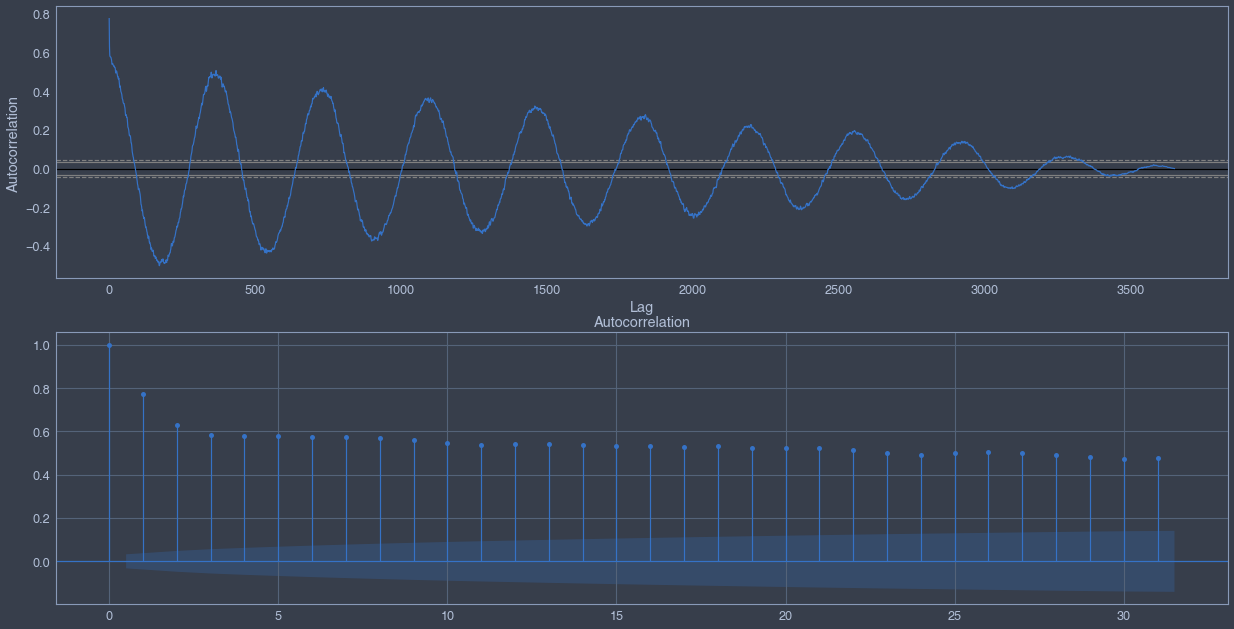

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(21, 11))

pd.plotting.autocorrelation_plot(df['Temp'], ax=ax[0])
plot_acf(df['Temp'], lags=31, ax=ax[1]);
